<a href="https://colab.research.google.com/github/sid321axn/machine_learning/blob/master/Stock_Price_Prediction_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
! pip install iexfinance

In [14]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
import seaborn
from sklearn.grid_search import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Downloading S&P500 data
We will download the S&P500 data from IEX finance.

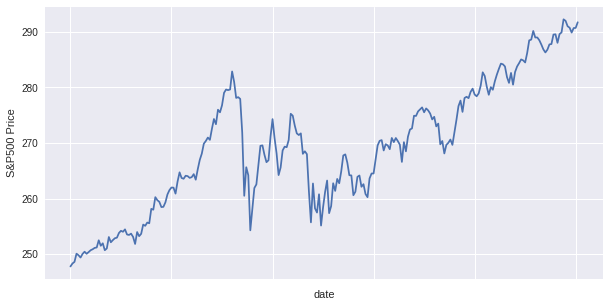

In [26]:
# Fetch the Data
from iexfinance import get_historical_data 
from datetime import datetime

start = datetime(2017, 10, 1) # starting date: year-month-date
end = datetime(2018, 10, 1) # ending date: year-month-date

Df = get_historical_data('SPY', start=start, end=end, output_format='pandas')          
Df= Df.dropna()
Df = Df.rename (columns={'open':'Open', 'high':'High','low':'Low', 'close':'Close'})

Df.Close.plot(figsize=(10,5))
plt.ylabel("S&P500 Price")
plt.show()

# Determine the correct trading signal
If tomorrow's price is greater than today's price then we will buy the S&P500 index, else we will sell the S&P500 index. We will store +1 for buy signal and -1 for sell signal in Signal column. y is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict.

In [0]:
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)

# Creation of predictors datasets
The X is a dataset that holds the variables which are used to predict y, that is, whether the S&P500 index price will go up (1) or go down (-1) tomorrow. The X consists of variables such as 'Open - Close' and 'High - Low'. These can be understood as indicators based on which the algorithm will predict tomorrow's trend. Feel free to add mroe indicators and see the performance.

In [28]:
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low
X=Df[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
date,,
2017-10-02,-0.8152,1.0090
2017-10-03,-0.3928,0.6482
2017-10-04,-0.4616,0.8643
2017-10-05,-1.1000,1.4575
2017-10-06,-0.2160,0.8356


# Test and train data set split
Now, we will split data into training and test data set.

First 90% of data is used for training and remaining data for testing.<br>
X_train and y_train are training dataset.<br>
X_test and y_test are test dataset.<br>

In [0]:
split_percentage = 0.8
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_train = y[:split] 

# Test data set
X_test = X[split:]
y_test = y[split:]

# Support Vector Classifier (SVC)
We will use SVC() function from sklearn.svm.SVC library for the classification and create our classifier model using fit() method on the training data set.

In [0]:
cls = SVC().fit(X_train, y_train)

# Classifier Accuracy
We will compute the accuarcy of the algorithm on the train and test data set, by comparing the actual values of Signal with the predicted values of Signal. The function accuracy_score() will be used to calculate the accuracy.

In [33]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 66.17%
Test Accuracy: 52.94%


As we found that test accuracy is below 50% which is not effective and the model is underpormed
so, in next step we will tune the hyperparameters using **Gridsearch CV**

# Tuning the Hyperparameters of SVC

In [34]:


param_grid = {'C':[1,0.25,0.5,0.75],'gamma':[1,2,3,0.1], 'kernel':['linear','rbf'],'decision_function_shape':['ovo','ovr'],'shrinking':[True,False]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4,cv=5)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] C=1, decision_function_shape=ovo, gamma=1, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovo, gamma=1, kernel=linear, shrinking=True, score=0.585366 -   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=1, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovo, gamma=1, kernel=linear, shrinking=True, score=0.575000 -   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=1, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovo, gamma=1, kernel=linear, shrinking=True, score=0.575000 -   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=1, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovo, gamma=1, kernel=linear, shrinking=True, score=0.575000 -   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=1, kernel=linear, shrinking=True 
[CV]  C=1, decision_function_shape=ovo, gamma=1, kernel=linear, shrinking=True, score=0.575000 -   0.0s
[CV] C=1, decision_fun

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, decision_function_shape=ovo, gamma=3, kernel=rbf, shrinking=True, score=0.525000 -   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=3, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, gamma=3, kernel=rbf, shrinking=False, score=0.463415 -   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=3, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, gamma=3, kernel=rbf, shrinking=False, score=0.550000 -   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=3, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, gamma=3, kernel=rbf, shrinking=False, score=0.550000 -   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=3, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, gamma=3, kernel=rbf, shrinking=False, score=0.475000 -   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=3, kernel=rbf, shrinking=False 
[CV]  C=1, decision_function_shape=ovo, gamma=3, kernel=rbf, shrinking=False, score=0.525000 -   0.0s
[CV]

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 0.25, 0.5, 0.75], 'gamma': [1, 2, 3, 0.1], 'kernel': ['linear', 'rbf'], 'decision_function_shape': ['ovo', 'ovr'], 'shrinking': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=4)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
accuracy_train = accuracy_score(y_train, grid.predict(X_train))
accuracy_test = accuracy_score(y_test, grid.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 57.71%
Test Accuracy: 56.86%


An accuracy of 55%+ in test data suggests that the classifier model is effective.

#Predict signal
We will predict the signal (buy or sell) for the test data set, using the grid.predict() fucntion.

# Compute returns in test period
We will compute the strategy returns based on the predicted signal, and then save it in the column 'Strategy_Return' and plot the cumulative strategy returns.

#Strategy Implementation

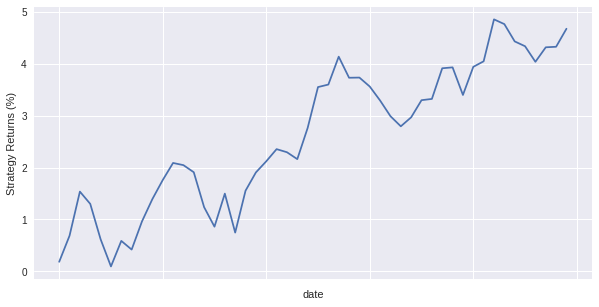

In [52]:
Df['Predicted_Signal'] = grid.predict(X)
# Calculate log returns
Df['Return'] = np.log(Df.Close.shift(-1) / Df.Close)*100
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal
Df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()